# Quiz 2 - RNN
Wyatt Blair

DUE: 5/5/2024

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import random

import sys
sys.path.append('../')

from data import get_data
from util import plot_data, evaluate_model

In [2]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [3]:
data = get_data()

___
## Recurrent Neural Network (RNN)

$h_t = f_W (h_{t-1}, x_t)$
        
$h_t :=$ new state

$f_W :=$ function with parameters $W$

$h_{t-1} :=$ previous state

$x_t :=$ input vector at time step $t$

In [4]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, batch_size):
        super(RNN, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.batch_size = batch_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        
        x = x.view(1, -1, 1)

        # Initialize hidden state with zeros
        h0 = torch.zeros(1, self.batch_size, self.hidden_size).to(x.device)

        # Forward propagate the RNN
        out, hn = self.rnn(x, h0)
        
        # Take the last hidden state
        out = self.fc(out[:, -1, :])
        return out

Training RNN:   0%|          | 0/200 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.73188
--> TEST : 0.00344
--> FULL : 0.72927
MSE-Scores: 
--> TRAIN: 0.01036
--> TEST : 0.01682
--> FULL : 0.01165


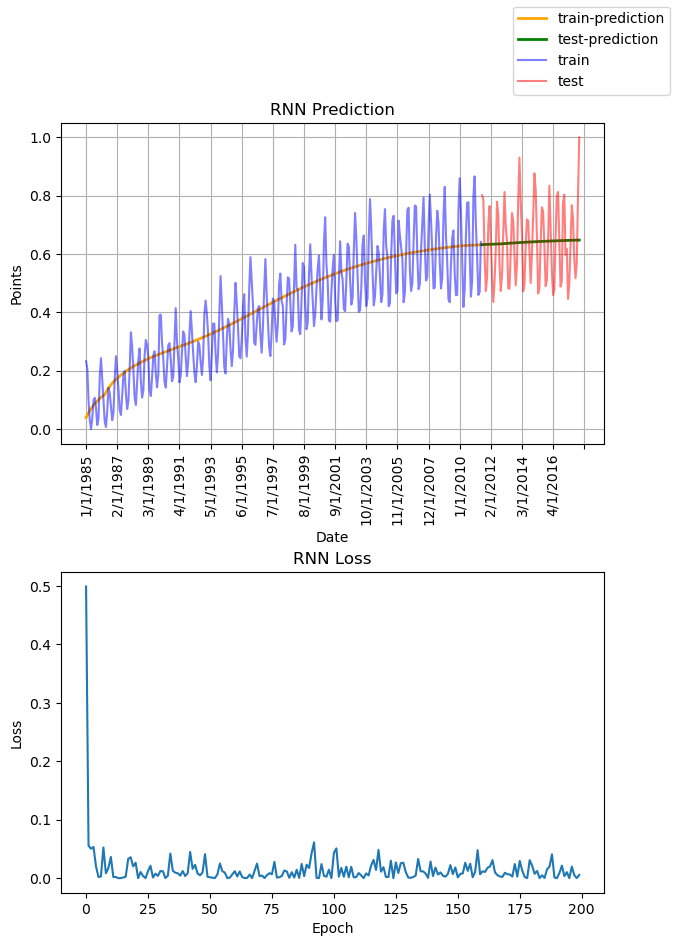

In [5]:
# instantiate model
model_kwargs = {
    'input_size': 1,
    'hidden_size': 16,
    'output_size': 1,
    'batch_size': data['batch_size'],
}
model = RNN(**model_kwargs)

# run train/evaluation
evaluation_kwargs = {
    'model': model,
    'num_epochs': 200,
    'lr': 0.0001,
}
evaluate_model(**evaluation_kwargs)